 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_df = pd.read_csv("whale_returns.csv",index_col = 'Date', infer_datetime_format=True,parse_dates=True)
whale_df.sort_index(inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df.dropna(inplace=True)
# Verify nulls dropped
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_df = pd.read_csv("algo_returns.csv",index_col = 'Date',infer_datetime_format=True,parse_dates=True)
algo_returns_df.sort_index(inplace=True)
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns_df.dropna(inplace=True)
# Verify nulls dropped
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_df = pd.read_csv("sp500_history.csv",index_col = 'Date',infer_datetime_format=True,parse_dates=True)
sp500_df.sort_index(inplace=True)
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].replace('\$',"",regex=True).astype(float)
sp500_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [11]:
# Calculate Daily Returns
sp500_returns = sp500_df.pct_change()
sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [12]:
# Drop nulls
sp500_returns.dropna(inplace = True)

# Verify nulls dropped
sp500_returns.isnull().sum()

Close    0
dtype: int64

In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns.rename({'Close':'S&P500'},axis='columns',inplace=True)
sp500_returns.head()

,S&P500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df,algo_returns_df,sp500_returns],axis=1)

# Drop Nulls
combined_df.dropna(inplace=True)
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'All Daily Returns'}, xlabel='Date'>

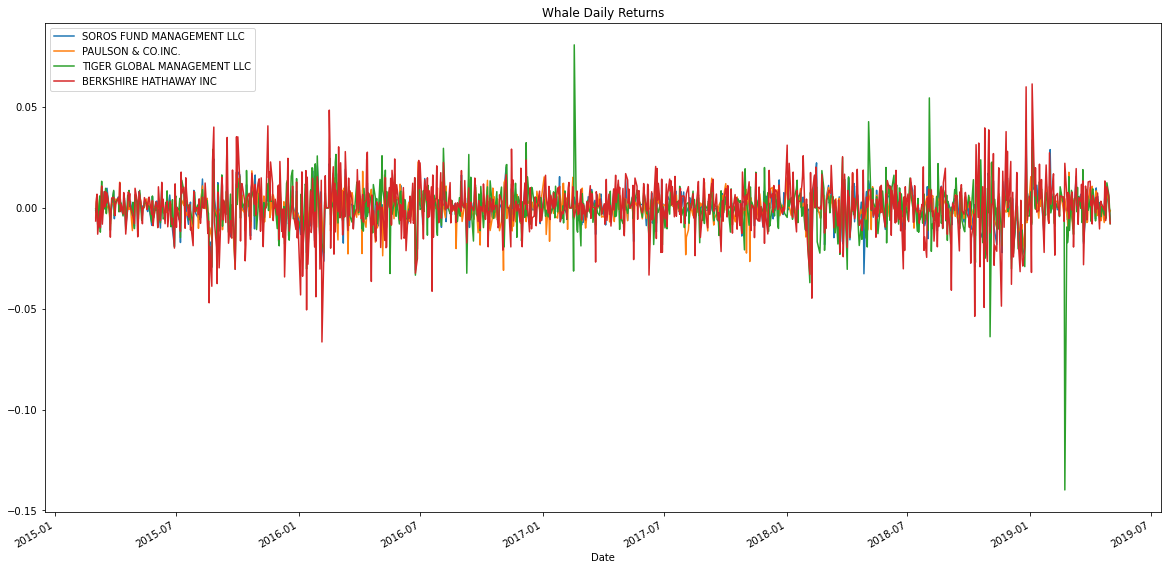

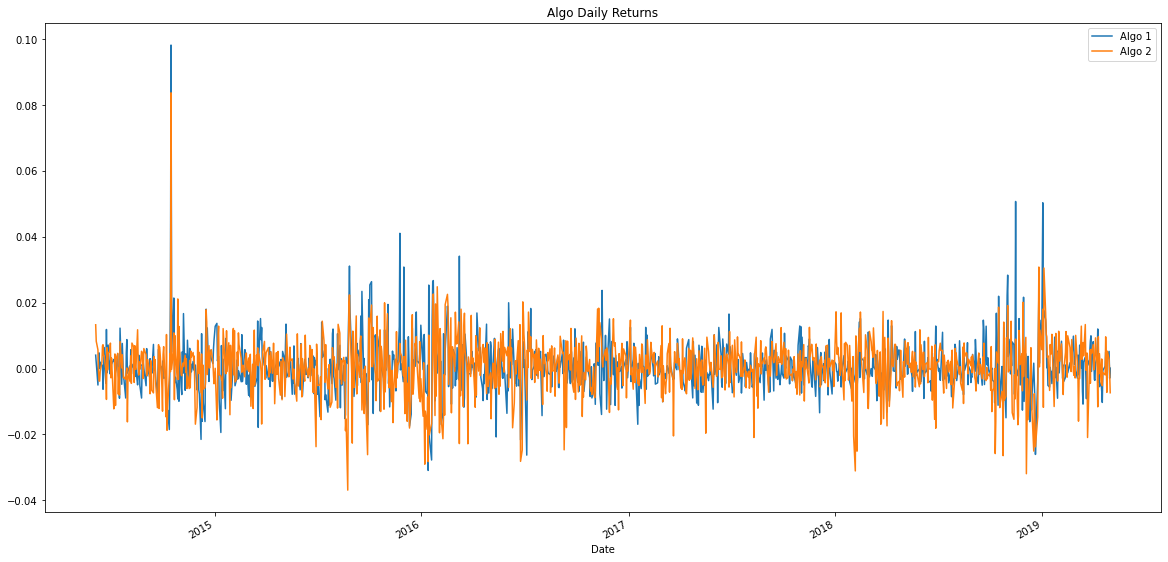

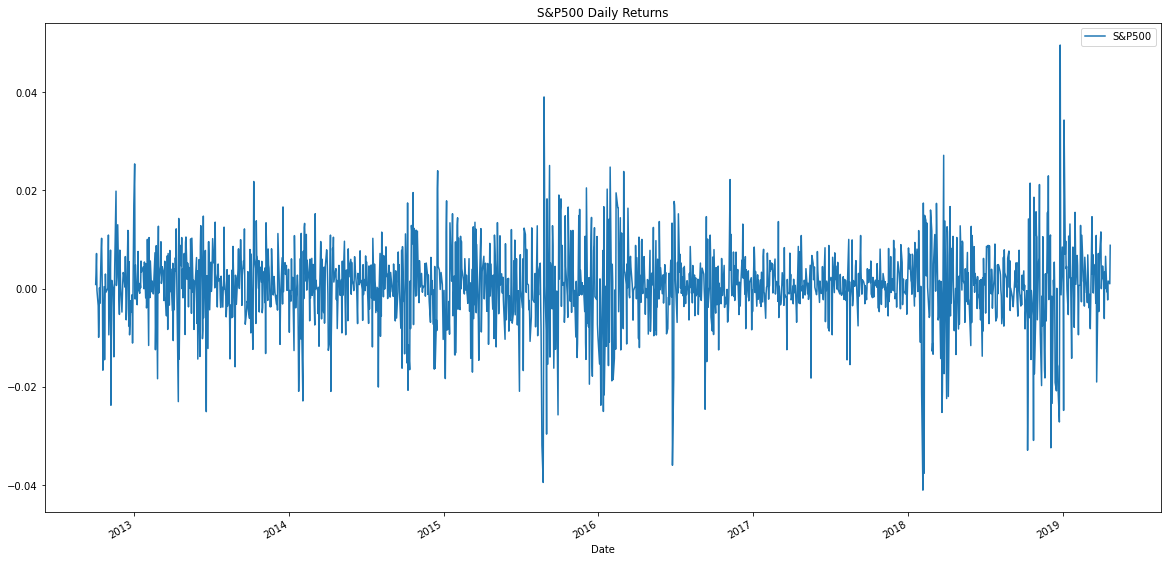

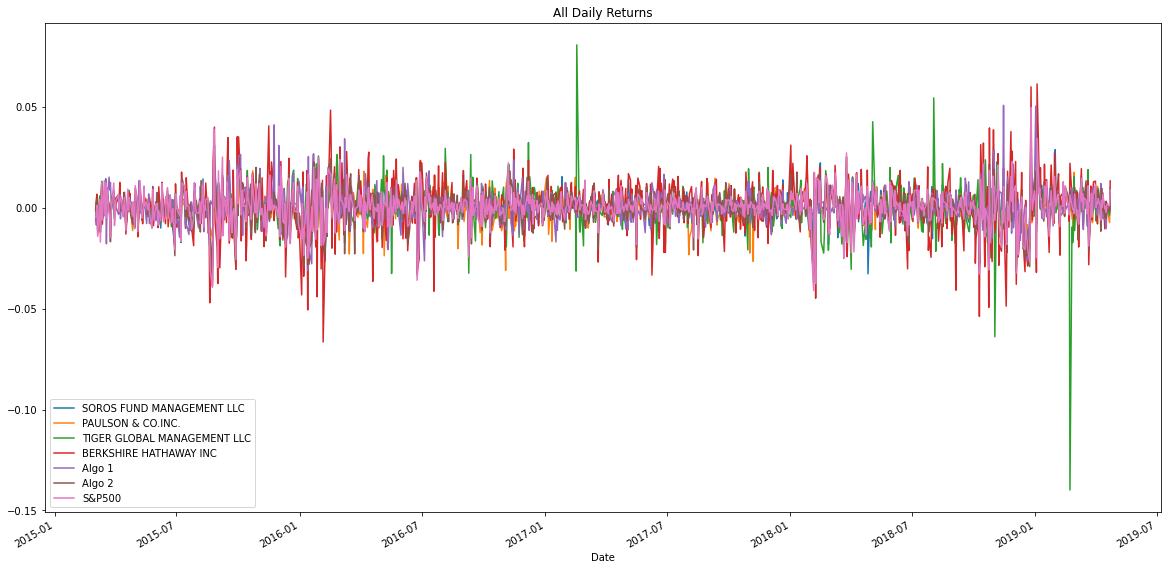

In [15]:
# Plot daily returns of all portfolios
whale_df.plot(figsize=(20,10),title='Whale Daily Returns')
algo_returns_df.plot(figsize=(20,10),title='Algo Daily Returns')
sp500_returns.plot(figsize=(20,10),title='S&P500 Daily Returns')
combined_df.plot(figsize=(20,10),title = 'All Daily Returns')

#### Calculate and Plot cumulative returns.

In [16]:
# Calculate cumulative returns of all portfolios
combined_cum_returns = (1+combined_df).cumprod()-1

#### Commented this out, calculating seperate cumulative returns on the portfolio data produces inconsistent time frames and produces skewed data... 
#whale_cumulative_returns = (1+whale_df).cumprod()-1
#algo_cumulative_returns = (1+algo_returns_df).cumprod()-1
#sp500_cumulative_returns = (1+sp500_returns).cumprod()-1

# Combine cumulative returns into 1 df
# this is done with above code, if we used the commented out code, could run the following to combine cumulative returns into 1 df...
# combined_cum_returns = pd.concat([whale_cumulative_returns,algo_cumulative_returns,sp500_cumulative_returns],axis=1)
# combined_cum_returns.dropna(inplace=True)

combined_cum_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,-0.010514,0.001464,-0.008907
2015-03-05,0.004981,0.002314,-0.000681,0.004327,-0.011459,0.005794,-0.007722
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,-0.016359,-0.005733,-0.021786
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466,-0.021717,-0.004437,-0.017928


<AxesSubplot:xlabel='Date'>

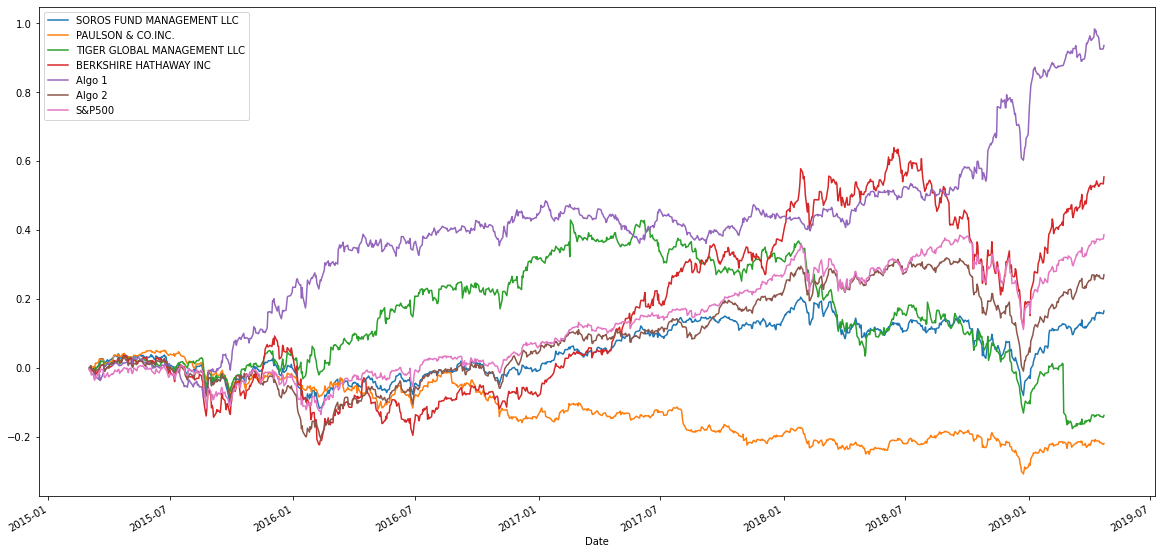

In [17]:
# Plot cumulative returns
combined_cum_returns.plot(figsize=(20,10))

# ***ANSWER: Berkshire and Algo 1 outperformed the S&P500 over the time period***

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

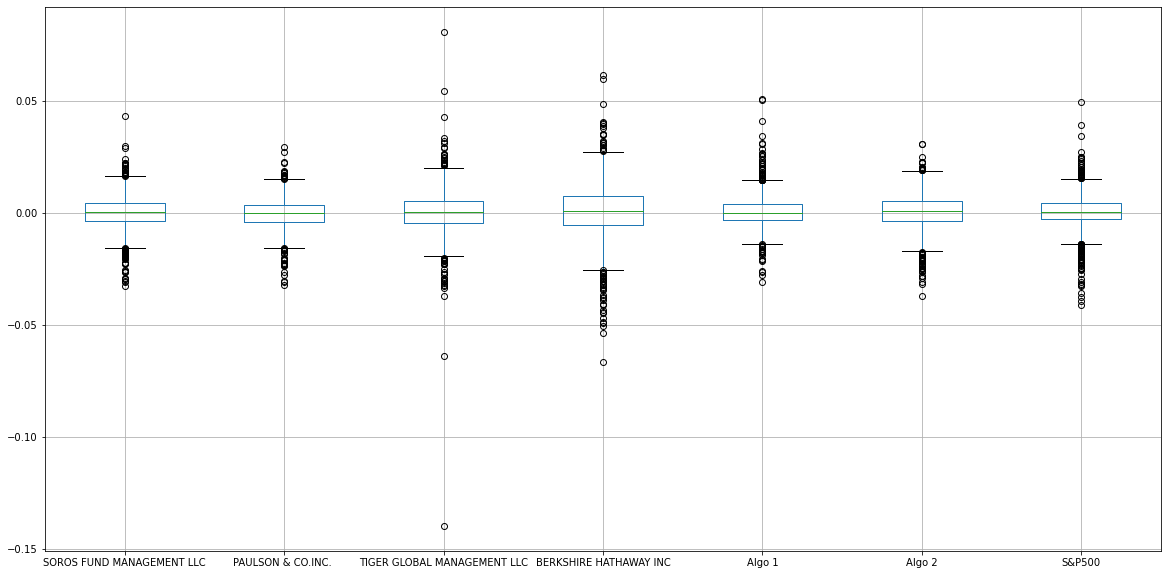

In [18]:
# Box plot to visually show risk
combined_df.boxplot(figsize=(20,10))

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
combined_std_df = combined_df.std().to_frame()
combined_std_df.rename(columns = {0:"STD"},inplace =True)
combined_std_df


,STD
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007620
Algo 2,0.008342
S&P500,0.008554


### Determine which portfolios are riskier than the S&P 500

In [20]:
# Calculate  the daily standard deviation of S&P 500
combined_std_df['STD']['S&P500']

0.008553731597758204

In [21]:
# Determine which portfolios are riskier than the S&P 500
riskier_than_sp500 = combined_std_df[combined_std_df['STD'] > combined_std_df['STD']['S&P500']]

print(f"These funds had more risk than S&P500:\n\n {riskier_than_sp500}")

These funds had more risk than S&P500:

                                   STD
TIGER GLOBAL MANAGEMENT LLC  0.010894
BERKSHIRE HATHAWAY INC       0.012919


### Calculate the Annualized Standard Deviation

In [22]:
# Calculate the annualized standard deviation (252 trading days)
combined_df_annualized_std = combined_df.std() * np.sqrt(252)
combined_df_annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P500                         0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

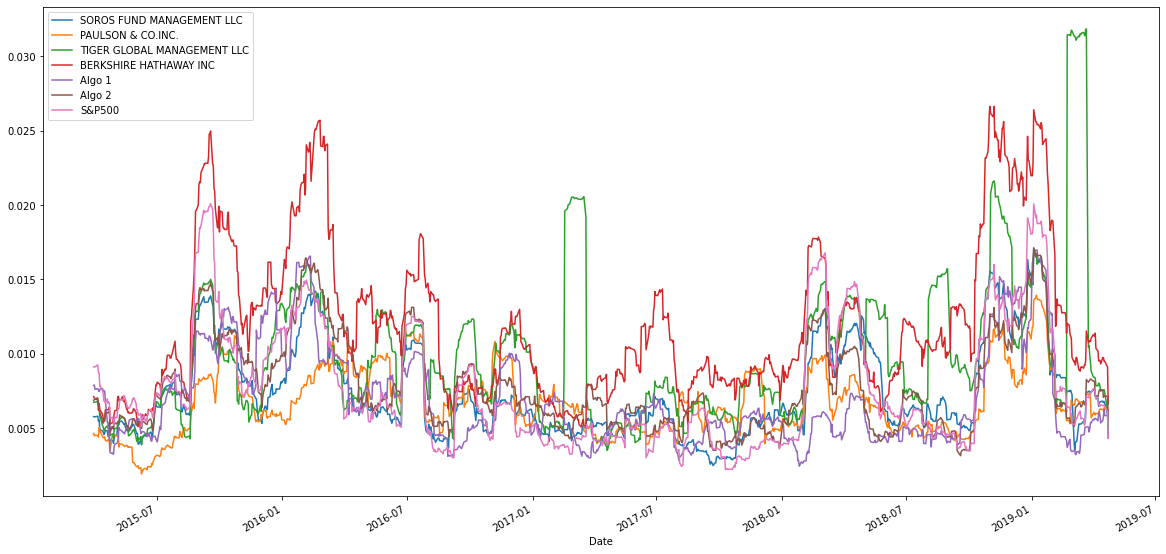

In [23]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_df.rolling(window=21).std().plot(figsize=(20,10))

# Plot the rolling standard deviation
# this is combined above

### Calculate and plot the correlation

In [24]:
# Calculate the correlation
correlation = combined_df.corr()
# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

1.8217749991632744e-05
7.316632424648712e-05
0.24899091459425637


<AxesSubplot:title={'center':'Rolling 60-Day Beta of Algo1'}, xlabel='Date'>

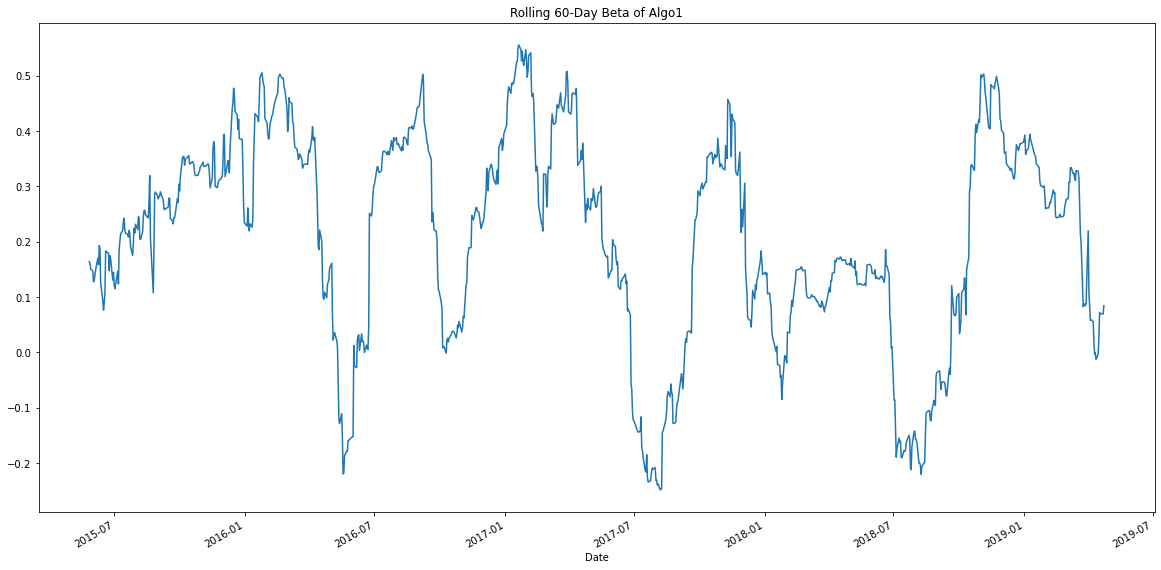

In [25]:
# Calculate covariance of a single portfolio
covariance_algo1 = combined_df['Algo 1'].cov(combined_df['S&P500'])
print(covariance_algo1)

# Calculate variance of S&P 500
variance = combined_df['S&P500'].var()
print(variance)

# Computing beta
algo1_beta = covariance_algo1/variance
print(algo1_beta)

# Plot beta trend (60 day rolling beta)
rolling_covariance = combined_df['Algo 1'].rolling(window=60).cov(combined_df['S&P500'])
rolling_variance = combined_df['S&P500'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20,10), title='Rolling 60-Day Beta of Algo1')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [26]:
# Use `ewm` to calculate the rolling window
combined_df.ewm(halflife=21).mean()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.000511,-0.000802,-0.001532,-0.001089,-0.005320,0.000761,-0.004462
2015-03-05,0.001718,0.000878,-0.000193,0.001603,-0.003817,0.001988,-0.002514
2015-03-06,-0.000808,-0.000291,-0.002369,-0.002256,-0.004116,-0.001542,-0.005575
2015-03-09,-0.000511,0.000673,-0.000616,-0.002128,-0.004400,-0.000935,-0.003543
...,...,...,...,...,...,...,...
2019-04-16,0.001480,0.000448,-0.000813,0.001862,0.000912,0.001364,0.001352
2019-04-17,0.001338,0.000223,-0.000930,0.001906,0.000548,0.001150,0.001234
2019-04-18,0.001341,0.000256,-0.000881,0.001907,0.000511,0.001073,0.001246


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [27]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P500                         0.648267
dtype: float64

<AxesSubplot:>

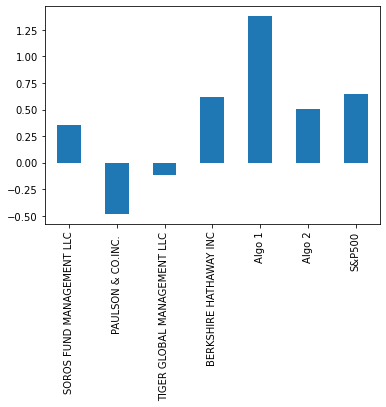

In [28]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Based on these Sharpe Ratios, Algo 1 outperforms both the market and the whales portfolios. Algo 2 does not outperform the market, or Berkshire...however it does outperform Soros, Paulson, and Tiger.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [29]:
# Reading data from 1st stock
amzn_df = pd.read_csv("AMZN.csv",index_col = 'Date', infer_datetime_format=True,parse_dates=True)
amzn_df.index = amzn_df.index.date
amzn_df.sort_index(inplace=True)
amzn_df

,Close
2015-03-03,384.61
2015-03-04,382.72
2015-03-05,387.83
2015-03-06,380.09
2015-03-09,378.56
...,...
2019-04-15,1844.87
2019-04-16,1863.04
2019-04-17,1864.82
2019-04-18,1861.69


In [30]:
# Reading data from 2nd stock
mbi_df = pd.read_csv("MBI.csv",index_col = 'Date', infer_datetime_format=True,parse_dates=True)
mbi_df.index = mbi_df.index.date
mbi_df.sort_index(inplace=True)
mbi_df.head()

,Close
2015-03-03,9.28
2015-03-04,9.37
2015-03-05,9.37
2015-03-06,9.25
2015-03-09,9.06


In [31]:
# Reading data from 3rd stock
msft_df = pd.read_csv("MSFT.csv",index_col = 'Date', infer_datetime_format=True,parse_dates=True)
msft_df.index = msft_df.index.date
msft_df.sort_index(inplace=True)
msft_df.head()

,Close
2015-03-03,43.28
2015-03-04,43.06
2015-03-05,43.11
2015-03-06,42.36
2015-03-09,42.85


In [32]:
# Combine all stocks in a single DataFrame
combined_stocks = pd.concat([amzn_df,mbi_df,msft_df],axis=1)
combined_stocks

,Close,Close,Close
2015-03-03,384.61,9.28,43.28
2015-03-04,382.72,9.37,43.06
2015-03-05,387.83,9.37,43.11
2015-03-06,380.09,9.25,42.36
2015-03-09,378.56,9.06,42.85
...,...,...,...
2019-04-15,1844.87,9.30,121.05
2019-04-16,1863.04,9.45,120.77
2019-04-17,1864.82,9.48,121.77
2019-04-18,1861.69,9.45,123.37


In [33]:
# Reset Date index
# This was done in steps above

In [34]:
# Reorganize portfolio data by having a column per symbol
combined_stocks.columns = ['AMZN','MBI','MSFT']
combined_stocks.head()

,AMZN,MBI,MSFT
2015-03-03,384.61,9.28,43.28
2015-03-04,382.72,9.37,43.06
2015-03-05,387.83,9.37,43.11
2015-03-06,380.09,9.25,42.36
2015-03-09,378.56,9.06,42.85


In [35]:
# Calculate daily returns
combined_stocks_returns = combined_stocks.pct_change()
# Drop NAs
combined_stocks_returns.dropna(inplace=True)
# Display sample data
combined_stocks_returns.head()

,AMZN,MBI,MSFT
2015-03-04,-0.004914,0.009698,-0.005083
2015-03-05,0.013352,0.000000,0.001161
2015-03-06,-0.019957,-0.012807,-0.017397
2015-03-09,-0.004025,-0.020541,0.011568
2015-03-10,-0.023906,-0.022075,-0.019137


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [36]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_weighted_returns = combined_stocks_returns.dot(weights).to_frame()
# Display sample data
portfolio_weighted_returns.rename(columns = {0:"returns"},inplace =True)
portfolio_weighted_returns

,returns
2015-03-04,-0.000100
2015-03-05,0.004838
2015-03-06,-0.016720
2015-03-09,-0.004333
2015-03-10,-0.021706
...,...
2019-04-15,-0.004341
2019-04-16,0.007888
2019-04-17,0.004137
2019-04-18,0.002766


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [37]:
# Join your returns DataFrame to the original returns DataFrame
combined_df['My Portfolio']= portfolio_weighted_returns['returns']
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,My Portfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.000100
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,0.004838
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.016720
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,-0.004333


In [38]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_df.dropna(inplace=True)
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,My Portfolio
Date,,,,,,,,
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.000100
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,0.004838
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.016720
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,-0.004333
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.016961,-0.021706


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [39]:
# Calculate the annualized `std`
portfolio_std = combined_df.std() * np.sqrt(252)
portfolio_std

SOROS FUND MANAGEMENT LLC      0.125406
PAULSON & CO.INC.              0.111556
TIGER GLOBAL MANAGEMENT LLC    0.173072
BERKSHIRE HATHAWAY INC         0.205148
Algo 1                         0.121058
Algo 2                         0.132475
S&P500                         0.135831
My Portfolio                   0.242988
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling Standard Deviations (21-Day)'}, xlabel='Date'>

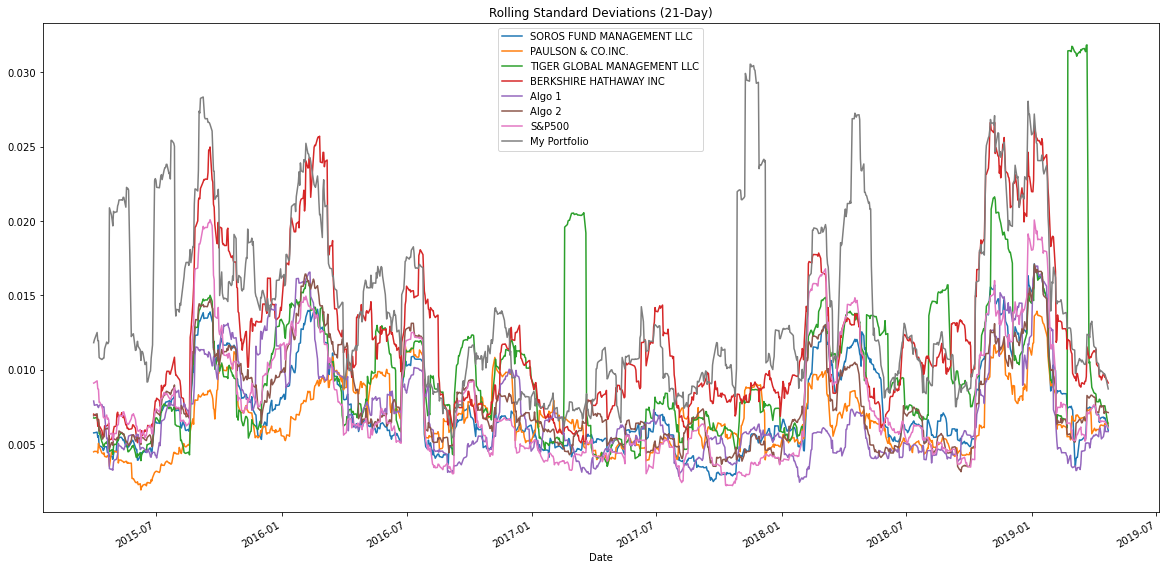

In [40]:
# Calculate rolling standard deviation
combined_df.rolling(window=21).std()
# Plot rolling standard deviation
combined_df.rolling(window=21).std().plot(figsize=(20,10),title="Rolling Standard Deviations (21-Day)")

### Calculate and plot the correlation

In [41]:
# Calculate and plot the correlation
correlation = combined_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,My Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.699870,0.561043,0.754182,0.320864,0.826726,0.837776,0.637010
PAULSON & CO.INC.,0.699870,1.000000,0.434380,0.545294,0.268483,0.678147,0.669517,0.487421
TIGER GLOBAL MANAGEMENT LLC,0.561043,0.434380,1.000000,0.424166,0.164111,0.507161,0.623853,0.410881
BERKSHIRE HATHAWAY INC,0.754182,0.545294,0.424166,1.000000,0.291557,0.687785,0.751062,0.610803
Algo 1,0.320864,0.268483,0.164111,0.291557,1.000000,0.287823,0.279002,0.275710
Algo 2,0.826726,0.678147,0.507161,0.687785,0.287823,1.000000,0.858683,0.630839
S&P500,0.837776,0.669517,0.623853,0.751062,0.279002,0.858683,1.000000,0.705951
My Portfolio,0.637010,0.487421,0.410881,0.610803,0.275710,0.630839,0.705951,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [42]:
# Import S&P500 data for Custom Portfolio dates
# Data already exists

<AxesSubplot:title={'center':'Rolling 60-Day Beta of My Portfolio'}, xlabel='Date'>

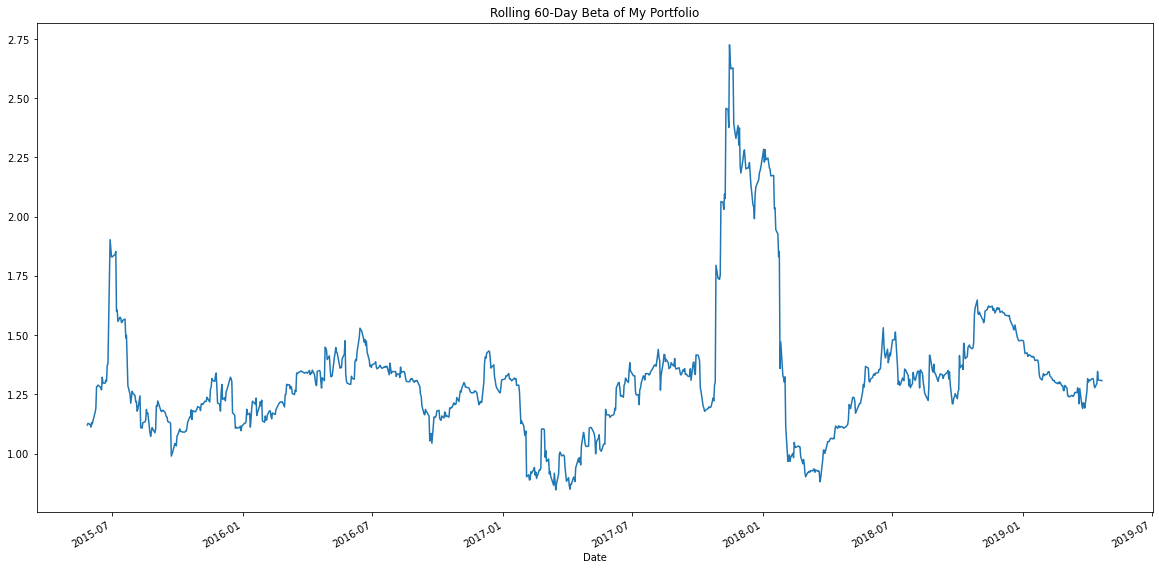

In [43]:
# Calculate and plot Beta
rolling_covariance = combined_df['My Portfolio'].rolling(window=60).cov(combined_df['S&P500'])
rolling_variance = combined_df['S&P500'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20,10), title='Rolling 60-Day Beta of My Portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [44]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios_custom= (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios_custom

SOROS FUND MANAGEMENT LLC      0.345506
PAULSON & CO.INC.             -0.480959
TIGER GLOBAL MANAGEMENT LLC   -0.129556
BERKSHIRE HATHAWAY INC         0.614872
Algo 1                         1.374206
Algo 2                         0.486307
S&P500                         0.641630
My Portfolio                   1.125223
dtype: float64

<AxesSubplot:>

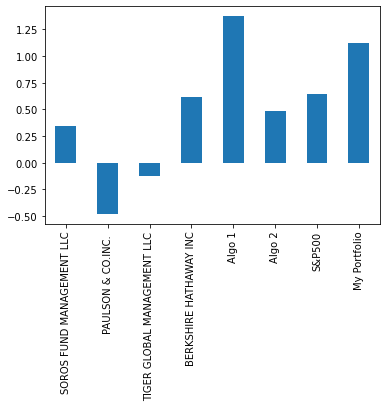

In [45]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_custom.plot.bar()

### How does your portfolio do?

Based on sharpe ratios, my portfolio outperforms the S&P500, but not Algo 1.